In [38]:
import os
import pandas as pd
import numpy as np
import arviz as az

from cmdstanpy import CmdStanModel, cmdstan_path, set_cmdstan_path

az.style.use("arviz-darkgrid")
%matplotlib inline

In [2]:
set_cmdstan_path(os.path.join('/','opt','conda', 'bin', 'cmdstan'))
cmdstan_path()

'/opt/conda/bin/cmdstan'

In [19]:
stan_file = os.path.join('src', 'model.stan')

In [20]:
model = CmdStanModel(stan_file=stan_file)

16:19:37 - cmdstanpy - INFO - compiling stan file /home/jovyan/Stakeholders-Cooperativas/src/model.stan to exe file /home/jovyan/Stakeholders-Cooperativas/src/model
16:19:51 - cmdstanpy - INFO - compiled model executable: /home/jovyan/Stakeholders-Cooperativas/src/model


In [21]:
print(model)

CmdStanModel: name=model
	 stan_file=/home/jovyan/Stakeholders-Cooperativas/src/model.stan
	 exe_file=/home/jovyan/Stakeholders-Cooperativas/src/model
	 compiler_options=stanc_options={}, cpp_options={}


In [6]:
data_file = os.path.join('data', 'sample.csv')
list_columns = [
    # cooperada
    "NOME", "segmento",
    # respondente
    "sexo", "idade", "escolaridade", "cargo", "anos_trabalhados",
    # cooperada
    "idade_geral", "idade_formal", "numero_cooperados", "pessoas_adm", "acordos", "faturamento",
    # stakeholders
    "federal_1", "federal_2", "federal_3",
    "estadual_municipal_1", "estadual_municipal_2", "estadual_municipal_3",
    "concorrentes_1", "concorrentes_2", "concorrentes_3",
    "fornecedores_1", "fornecedores_2", "fornecedores_3",
    "sociedade_1", "sociedade_2", "sociedade_3",
    "cooperados_1", "cooperados_2", "cooperados_3",
    "federal_4", "federal_5", "federal_6",
    "estadual_municipal_4", "estadual_municipal_5", "estadual_municipal_6",
    "concorrentes_4", "concorrentes_5", "concorrentes_6",
    "fornecedores_4", "fornecedores_5", "fornecedores_6",
    "sociedade_4", "sociedade_5", "sociedade_6",
    "cooperados_4", "cooperados_5", "cooperados_6",
    "federal_7", "federal_8", "federal_9",
    "estadual_municipal_7", "estadual_municipal_8", "estadual_municipal_9",
    "concorrentes_7", "concorrentes_8", "concorrentes_9",
    "fornecedores_7", "fornecedores_8", "fornecedores_9",
    "sociedade_7", "sociedade_8", "sociedade_9",
    "cooperados_7", "cooperados_8", "cooperados_9",
    # cooperada
    "flexibilidade", "valorizacao", "inovacao", "mudancas", "formalismo", "produtividade", "hierarquia", "controle"
]
df = pd.read_csv(data_file, sep=';', encoding='latin-1', names=list_columns, header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, COOPERATIVA DE PRODUÇÃO ARTESANAL DO CRUTAC to MARINGÁ CULTURAL COOPERATIVISMO
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NOME                  117 non-null    object
 1   segmento              117 non-null    object
 2   sexo                  117 non-null    object
 3   idade                 117 non-null    int64 
 4   escolaridade          117 non-null    object
 5   cargo                 117 non-null    object
 6   anos_trabalhados      117 non-null    int64 
 7   idade_geral           117 non-null    int64 
 8   idade_formal          117 non-null    int64 
 9   numero_cooperados     117 non-null    int64 
 10  pessoas_adm           117 non-null    int64 
 11  acordos               117 non-null    int64 
 12  faturamento           117 non-null    int64 
 13  federal_1             117 non-null    object
 14  federal_2             117

In [7]:
df.replace(["Discordo Totalmente", "Discordo", "Não concordo e nem discordo", "Concordo", "Concordo Totalmente"], [-2, -1, 0, 1, 2], inplace=True)

In [8]:
df.replace("Nem concordo nem discordo", 0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, COOPERATIVA DE PRODUÇÃO ARTESANAL DO CRUTAC to MARINGÁ CULTURAL COOPERATIVISMO
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NOME                  117 non-null    object
 1   segmento              117 non-null    object
 2   sexo                  117 non-null    object
 3   idade                 117 non-null    int64 
 4   escolaridade          117 non-null    object
 5   cargo                 117 non-null    object
 6   anos_trabalhados      117 non-null    int64 
 7   idade_geral           117 non-null    int64 
 8   idade_formal          117 non-null    int64 
 9   numero_cooperados     117 non-null    int64 
 10  pessoas_adm           117 non-null    int64 
 11  acordos               117 non-null    int64 
 12  faturamento           117 non-null    int64 
 13  federal_1             117 non-null    int64 
 14  federal_2             117

In [10]:
df.head()

,NOME,segmento,sexo,idade,escolaridade,cargo,anos_trabalhados,idade_geral,idade_formal,numero_cooperados,...,cooperados_8,cooperados_9,flexibilidade,valorizacao,inovacao,mudancas,formalismo,produtividade,hierarquia,controle
COOPERATIVA DE PRODUÇÃO ARTESANAL DO CRUTAC,Produtos Artesanal,Márcia Maria De Oliveira,Feminino,67,Ensino Superior,Presidente,30,54,54,120,...,-1,1,0,1,2,2,2,2,2,1
COOPERATIVA AMAZONENSE DE ARTESANATO,Artesanatato,Larissa,Feminino,65,Pós Graduado,Diretor,8,7,7,52,...,0,0,2,2,2,2,2,2,2,2
COOPERATIVA DE TRABALHADORES NO ESTADO DO TOCANTINS - COOPERTAB,Educacional,Giovanna,Feminino,37,Pós Graduado,Vice Presidente.,12,12,12,43,...,1,1,2,2,1,1,1,1,2,1
COOPERATIVA BORDANA,Bordado Manual,Celma Grace,Feminino,52,Pós Graduado,Diretora Presidentea,14,11,11,28,...,1,1,2,2,2,2,2,2,1,2
COOPERATIVA ARTESANAL MISTA DE PARNAÍBA LTDA,Ramo Trabalho,Sara,Feminino,60,Pós Graduado,Presidente,20,20,20,15,...,0,0,1,1,1,1,0,1,1,0


In [29]:
# atributos
df.iloc[:, [7, 9, 11]].describe()

,idade_geral,numero_cooperados,acordos
count,117.000000,117.000000,117.000000
mean,14.675214,65.196581,35.188034
std,12.460855,77.587352,351.071363
min,4.000000,6.000000,0.000000
25%,7.000000,21.000000,0.000000
50%,11.000000,34.000000,2.000000
75%,15.000000,64.000000,5.000000
max,54.000000,360.000000,3800.000000


In [15]:
# criar variaveis
df["stakeholders_total"] = df.iloc[:, 13:67].sum(axis=1)
df["cultura_total"] = df.iloc[:, 67:75].sum(axis=1)
df["cultura_idx"] = pd.cut(df["cultura_total"], 3, labels=[1, 2, 3])

In [16]:
# Variavel dependente stats
df["stakeholders_total"].describe()

count    117.000000
mean      16.726496
std       25.655753
min      -39.000000
25%        4.000000
50%       19.000000
75%       33.000000
max       60.000000
Name: stakeholders_total, dtype: float64

In [30]:
# dados para o modelo
data = {
    'N': df.shape[0],
    'K': df.iloc[:, [7, 9, 11]].shape[1],
    'X': df.iloc[:, [7, 9, 11]].to_numpy(),
    'y': df["stakeholders_total"].to_numpy(),
    'J': 3,
    'idx': df["cultura_idx"].to_numpy(),
}

In [31]:
fit = model.sample(data=data, parallel_chains=4)

17:30:47 - cmdstanpy - INFO - CmdStan start processing
chain 1:   0% 0/22 [00:00<?, ?it/s[{'value': 'Status'}]]
chain 2:   0% 0/22 [00:00<?, ?it/s[{'value': 'Status'}]]

chain 3:   0% 0/22 [00:00<?, ?it/s[{'value': 'Status'}]]


chain 4:   0% 0/22 [00:00<?, ?it/s[{'value': 'Status'}]]
chain 1:   9% 2/22 [00:00<00:01, 17.06it/s[{'value': 'Iteration:    1 / 2000 [  0%]  (Warmup)'}]]

chain 3:  27% 6/22 [00:00<00:00, 52.25it/s[{'value': 'Iteration:  400 / 2000 [ 20%]  (Warmup)'}]]


chain 4:  14% 3/22 [00:00<00:00, 26.28it/s[{'value': 'Iteration:  100 / 2000 [  5%]  (Warmup)'}]]
chain 2:  64% 14/22 [00:00<00:00, 67.72it/s[{'value': 'Iteration: 1100 / 2000 [ 55%]  (Sampling)'}]]

chain 1:  50% 11/22 [00:00<00:00, 53.23it/s[{'value': 'Iteration:  900 / 2000 [ 45%]  (Warmup)'}]]]]


chain 4:  64% 14/22 [00:00<00:00, 68.80it/s[{'value': 'Iteration: 1100 / 2000 [ 55%]  (Sampling)'}]]
chain 1: 100% 22/22 [00:00<00:00, 56.85it/s[{'value': 'Sampling completed'}]]                       
chain 2: 1


17:30:48 - cmdstanpy - INFO - CmdStan done processing.
17:30:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/home/jovyan/Stakeholders-Cooperativas/src/model.stan', line 29, column 2 to column 50)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/home/jovyan/Stakeholders-Cooperativas/src/model.stan', line 29, column 2 to column 50)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/home/jovyan/Stakeholders-Cooperativas/src/model.stan', line 29, column 2 to column 50)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/home/jovyan/Stakeholders-Cooperativas/src/model.stan', line 29, column 2 to column 50)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/home/jovyan/Stakeholders-Cooperativas/src/model.stan', line 29, column 2 to column 50)
	Exc

In [32]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-797.294000,0.097751,2.672650,-802.340000,-796.950000,-793.661000,747.56200,1394.71000,1.007870
alpha,3.944050,0.262154,6.067010,-3.074090,2.361760,16.532900,535.59400,999.24300,1.012440
beta[1],-0.497381,0.001823,0.094974,-0.655030,-0.496652,-0.341084,2714.36000,5064.10000,1.004250
beta[2],0.038282,0.000270,0.014685,0.014076,0.038207,0.062511,2955.86000,5514.66000,1.001630
beta[3],0.012753,0.000070,0.003162,0.007433,0.012792,0.017894,2013.00000,3755.59000,1.002680
sigma,11.923440,0.007500,0.369600,11.328600,11.909300,12.542500,2430.89264,4535.24745,0.999670
tau,20.063960,0.640010,10.693090,8.199540,17.587700,39.875400,279.14551,520.79386,1.008270
z[1],0.458596,0.017843,0.441271,-0.362721,0.501452,1.031580,611.59800,1141.04000,1.010980
z[2],0.436800,0.017794,0.449009,-0.410978,0.476781,1.042130,636.75800,1187.98000,1.008200
z[3],1.668720,0.022198,0.630900,0.729827,1.633670,2.812930,807.76900,1507.03000,1.005520


In [26]:
print(fit.diagnose())

Processing csv files: /tmp/tmp588geo8s/model14m16rzx/model-20230308162044_1.csv, /tmp/tmp588geo8s/model14m16rzx/model-20230308162044_2.csv, /tmp/tmp588geo8s/model14m16rzx/model-20230308162044_3.csv, /tmp/tmp588geo8s/model14m16rzx/model-20230308162044_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
5 of 4000 (0.12%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [46]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    # posterior_predictive="y_hat",
    # log_likelihood="log_lik",
    observed_data={"y": data["y"]},
    coords={
        "coefs": ["idade_geral", "numero_cooperados", "acordos"],
        "cultura_tercis": ["1_tercil", "2_tercil", "3_tercil"],
    },
    dims={
        "beta": ["coefs"],
        "y": ["N"],
        # "log_lik": ["school"],
        # "y_hat": ["school"],
        "alpha_j": ["cultura_tercis"],
        "z": ["cultura_tercis"],
    },
)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta\nidade_geral'}>,
        <Axes: title={'center': 'beta\nnumero_cooperados'}>],
       [<Axes: title={'center': 'beta\nacordos'}>,
        <Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'z\n1_tercil'}>,
        <Axes: title={'center': 'z\n2_tercil'}>,
        <Axes: title={'center': 'z\n3_tercil'}>],
       [<Axes: title={'center': 'alpha_j\n1_tercil'}>,
        <Axes: title={'center': 'alpha_j\n2_tercil'}>,
        <Axes: title={'center': 'alpha_j\n3_tercil'}>]], dtype=object)

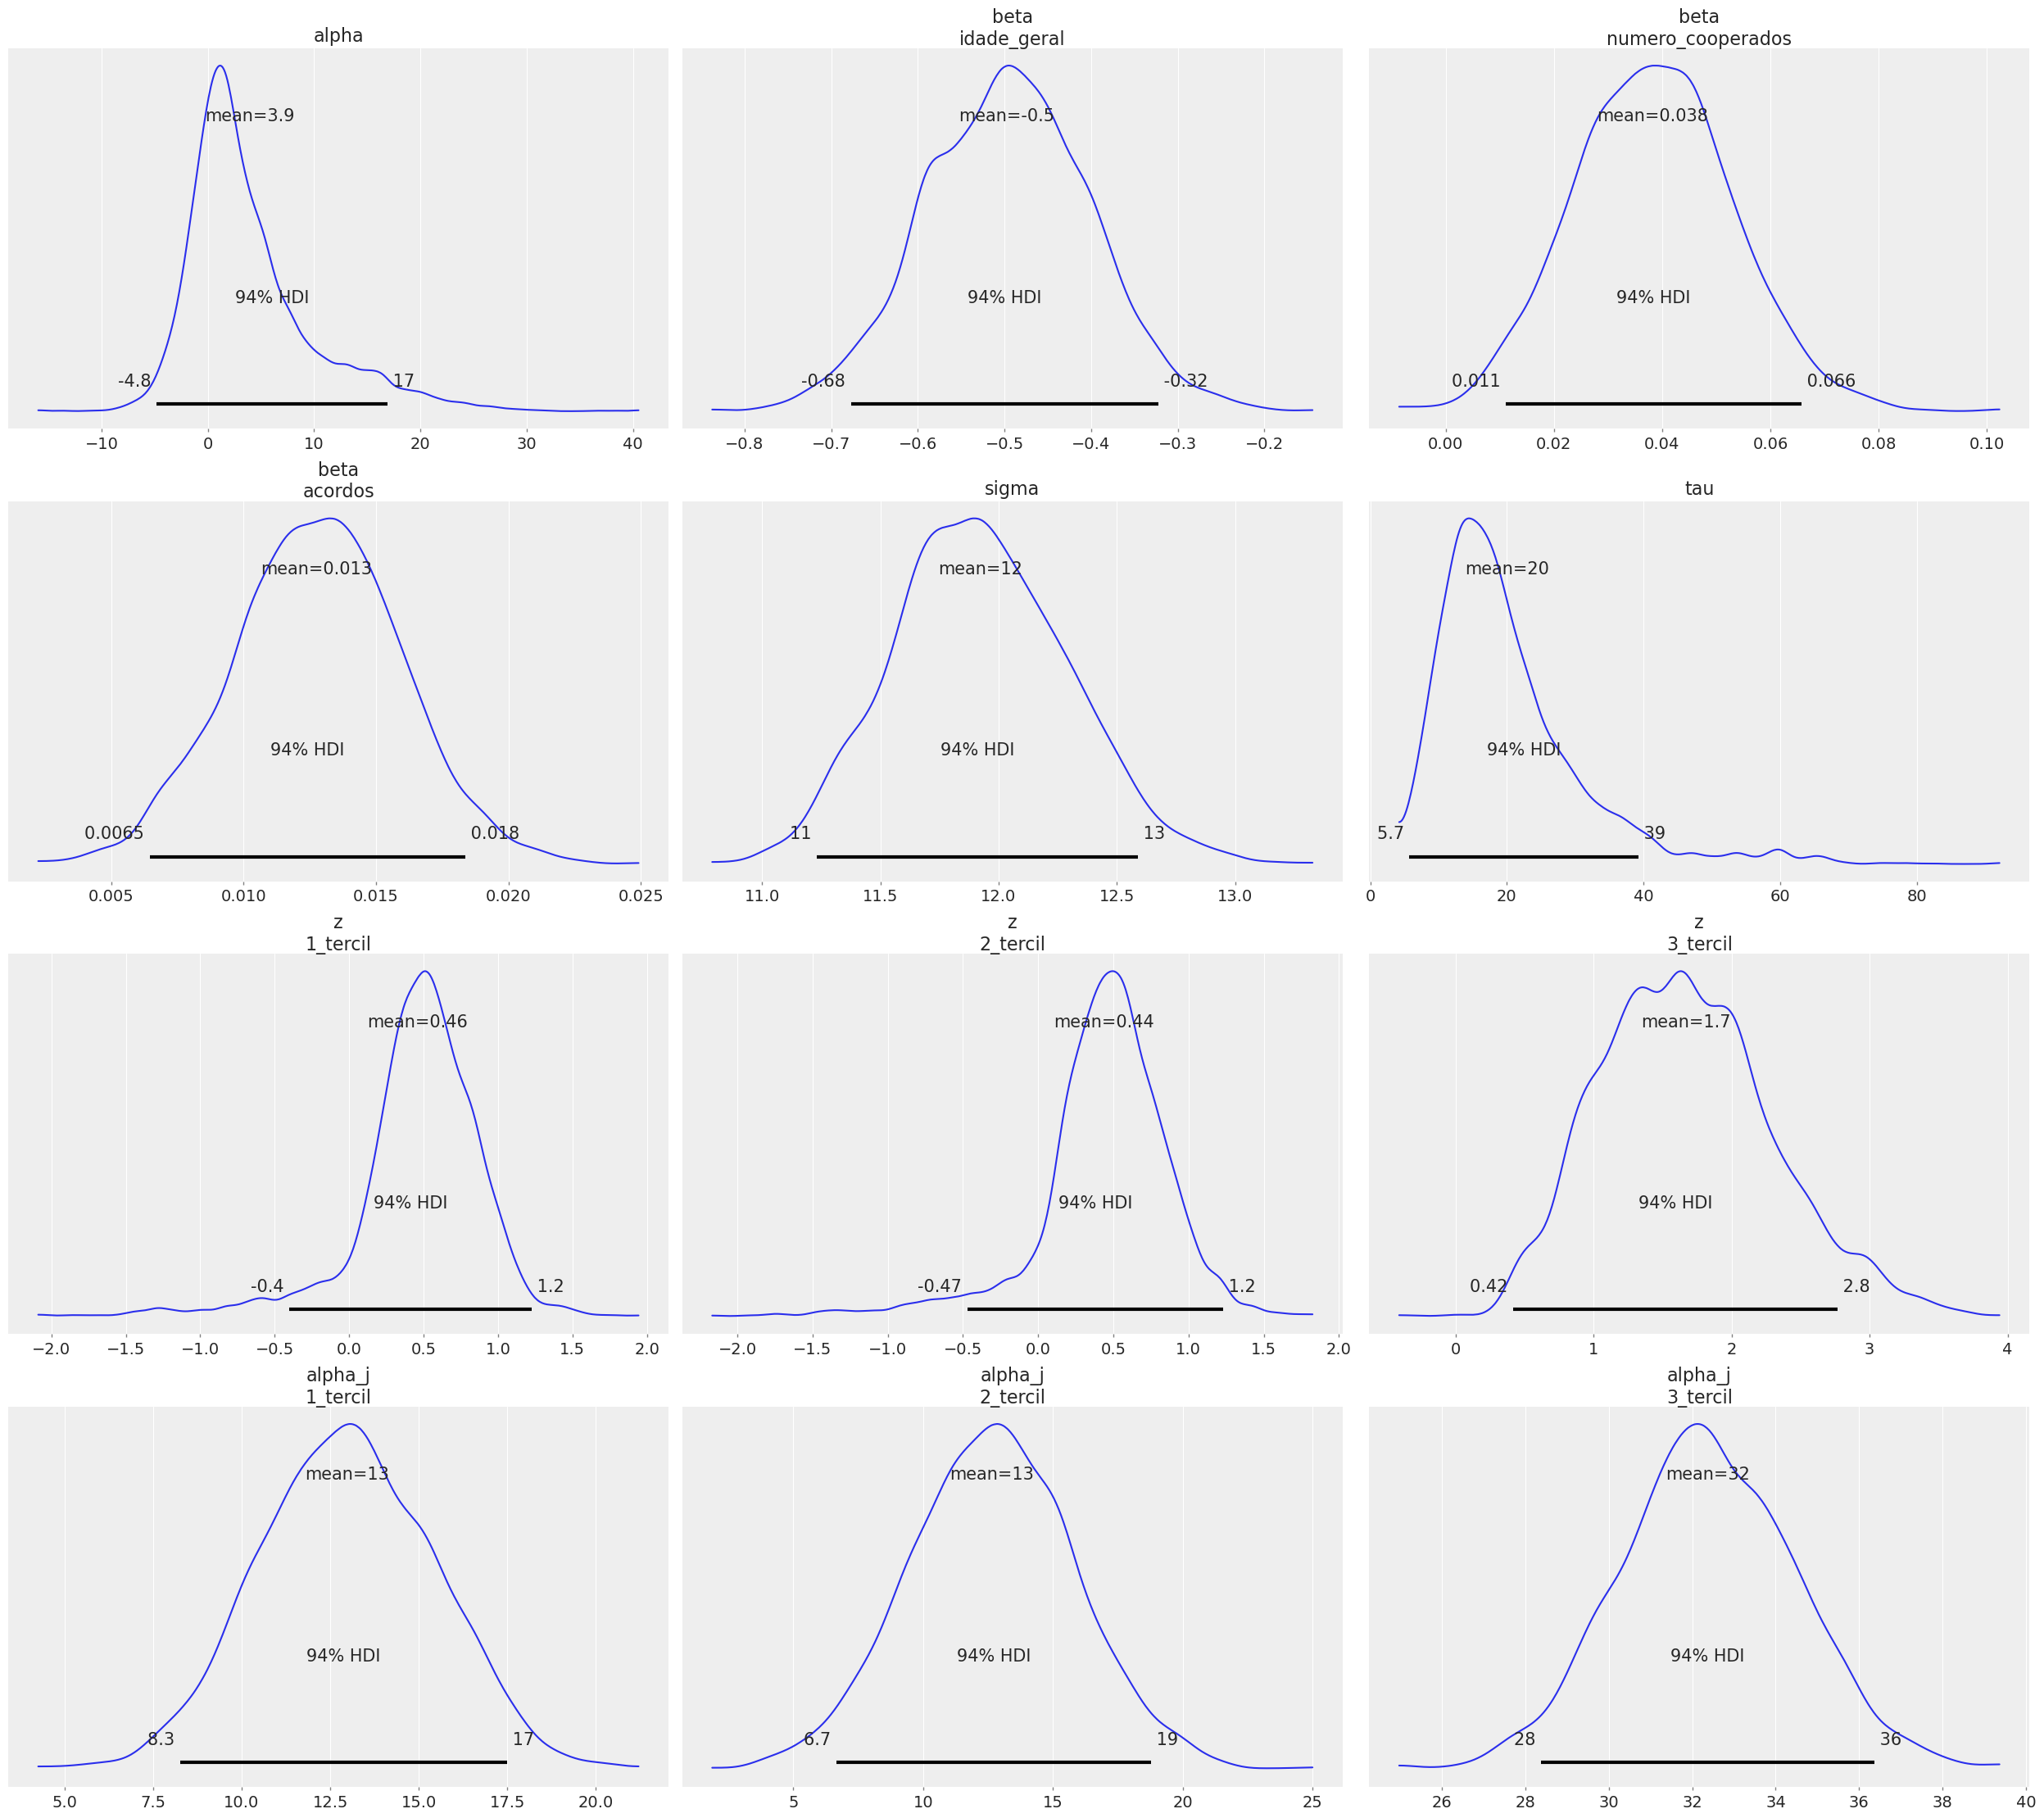

In [48]:
az.plot_posterior(cmdstanpy_data)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

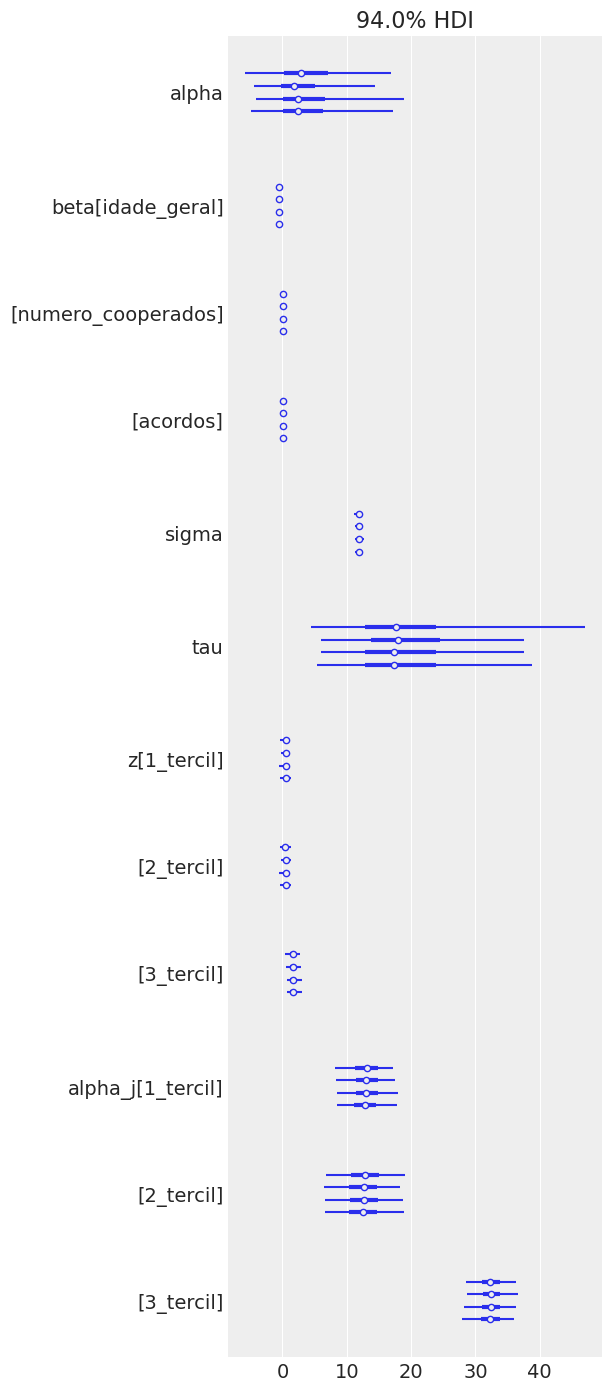

In [49]:
az.plot_forest(cmdstanpy_data)